#### Library Importing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### Import Data

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5


In [4]:
train.shape

(5380, 767)

In [2]:
test = pd.read_csv('../Kaggle/data/test.csv')
test.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02


#### Basic Data Cleaning (Filling Missing Values)

In [5]:
train.isna().sum().max()
#LOTS OF NA VALUES, USE UNSUPERVISED LEARNING TO FILL THEM!!!!! :D

863

In [3]:
test.isna().sum().max()
#LOTS OF NA VALUES, USE UNSUPERVISED LEARNING TO FILL THEM!!!!! :D

704

In [4]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
filled_test=imp.fit_transform(test)

[IterativeImputer] Completing matrix with shape (4403, 766)
[IterativeImputer] Ending imputation round 1/10, elapsed time 257.38
[IterativeImputer] Change: 2.2096953163083935e+37, scaled tolerance: 8.7631363782411e+38 
[IterativeImputer] Early stopping criterion reached.


In [6]:
fill_test=pd.DataFrame(filled_test).set_axis(list(test.columns),axis=1)
fill_test.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380.0,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,9.020487e+10,0.26,8.0,5.0,5.0,30.1213,27.95,-0.49
1,5381.0,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,3.744957e+10,0.02,16.0,1.0,8.0,2.1282,10.18,0.55
2,5382.0,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,1.084794e+10,0.83,35.0,1.0,19.0,7.8513,21.27,19.09
3,5383.0,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,3.720010e+07,0.51,1.0,4.0,0.0,9.0511,18.38,4.11
4,5384.0,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,1.640000e+13,0.12,2.0,1.0,2.0,2.6512,149.68,0.02


In [9]:
fill_test.to_csv('imputed_test.csv')

In [7]:
filled_train=pd.DataFrame(filled_train).set_axis(list(train.columns),axis=1)
filled_train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.706143,1.0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0


In [8]:
filled_train.isna().sum().max()

0

### Import imputed data:

In [5]:
filled_train = pd.read_csv('imputed_data.csv').drop(columns = 'Unnamed: 0')

In [6]:
filled_train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.706143,1.0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0


#### Train Test Split

In [7]:
X = filled_train.drop(columns = ['y','id'])
y = filled_train['y']
X.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,2.690000e+13,...,1.5707,0.0007,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,1.690000e+17,...,0.1173,0.1136,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.706143
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,1.350000e+14,...,0.4582,0.0029,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,3.700000e+16,...,0.3816,0.0000,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,6.000000e+12,...,0.0100,0.0005,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000


In [10]:
y.head()

0     5.0
1     1.0
2    11.0
3     1.0
4     5.0
Name: y, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

#### PCA

In [9]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)
reduced = pd.DataFrame(pca.transform(X_train_scaled))
reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,3.672030,-4.284480,5.591546,-1.487220,-0.182262,2.142671,1.975263,3.025397,-0.365030,-5.050890,...,-0.872031,0.129105,0.537751,0.709052,0.000807,-1.056454,0.735386,-0.334745,-0.523914,-0.001668
1,-17.003483,7.592416,-6.419262,-5.839680,-3.522541,-3.758352,0.470439,-1.845502,-4.571969,1.246735,...,0.922758,-1.028173,0.292939,0.390259,0.123830,-0.470193,0.355119,0.088661,-0.152916,0.108321
2,-3.125078,-7.667765,5.373933,-2.973137,0.726718,1.148711,2.419558,2.350925,-0.026822,-5.178135,...,0.322390,-0.084767,0.022238,0.262114,1.205037,-0.320391,0.363022,-0.011966,0.075508,-1.120118
3,-14.004884,0.255051,-5.939265,-3.146429,-7.197129,-0.593493,0.379731,4.196567,0.153989,-0.754448,...,-0.863796,0.515876,-0.251020,0.668039,0.043282,0.534125,-0.203532,1.450518,-0.394047,0.679475
4,-0.981854,-0.402113,1.391230,-4.798088,3.619417,0.485784,2.059451,3.707745,-4.737628,-2.212015,...,0.288619,0.757347,-0.228834,-0.522520,-0.250551,-0.031908,-0.873741,0.405086,-0.039014,0.569609


In [151]:
filled_train

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.706143,1.0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,1.586033e+08,0.05,0.0,0.0,0.0,2.7480,93.45,0.220000,4.0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,3.608917e+07,0.01,6.0,4.0,4.0,23.6890,76.05,-0.900000,8.0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1.786891e+06,0.53,44.0,0.0,28.0,4.3710,80.30,-0.700000,21.0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,1.940000e+11,0.29,3.0,2.0,2.0,24.6594,7.95,0.470000,13.0


# Tuning submodels for stacked sequential model: 

##### XGBoost Regressor

In [12]:
import xgboost as xgb

In [17]:
#Tuning XGBoost

param_grid = {'max_depth': [2,3,4,5],
    'learning_rate': [0.01,0.05,0.1],
    'reg_lambda':[2,10,100,200],
    'n_estimators':[6,8,10,12,14],
    'gamma':[0,10,1e2],
    'scale_pos_weight':[1.25,1.5,1.75]}

#cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state = 1),
                              param_grid =param_grid,
                              scoring = 'neg_root_mean_squared_error',
                              verbose = 2,n_jobs=-1,cv = 5)

optimal_params.fit(reduced,y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
       

In [20]:
optimal_params.best_params_

{'gamma': 10,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 14,
 'reg_lambda': 2,
 'scale_pos_weight': 1.5}

In [19]:
optimal_params.best_score_

-11.026756557150696

In [ ]:
xgmodel = xgb.XGBRegressor(max_depth = 
                          
                          
                          )

In [22]:
#fine search


param_grid = {'max_depth': [10,12,15],
    'learning_rate': [0.1,0.5,1],
    'reg_lambda':[1,2],
    'n_estimators':[15,20,25],
    'gamma':[10],
    'scale_pos_weight':[1.5]}

#cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state = 1),
                              param_grid =param_grid,
                              scoring = 'neg_root_mean_squared_error',
                              verbose = 2,n_jobs=-1,cv = 5)

optimal_params.fit(reduced,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    

In [23]:
optimal_params.best_score_

-10.959783293664952

In [24]:
optimal_params.best_params_

{'gamma': 10,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 25,
 'reg_lambda': 1,
 'scale_pos_weight': 1.5}

In [25]:
#finer search


param_grid = {'max_depth': [8,10],
    'learning_rate': [0.05,0.1],
    'reg_lambda':[1],
    'n_estimators':[30,40,50],
    'gamma':[10],
    'scale_pos_weight':[1.5]}

#cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state = 1),
                              param_grid =param_grid,
                              scoring = 'neg_root_mean_squared_error',
                              verbose = 2,n_jobs=-1,cv = 5)

optimal_params.fit(reduced,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    

In [26]:
optimal_params.best_score_

-10.626342443420496

In [27]:
optimal_params.best_params_

{'gamma': 10,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 50,
 'reg_lambda': 1,
 'scale_pos_weight': 1.5}

In [28]:
param_grid = {'max_depth': [8],
    'learning_rate': [0.1,0.15],
    'reg_lambda':[1],
    'n_estimators':[100,150,200],
    'gamma':[10],
    'scale_pos_weight':[1.5]}

#cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state = 1),
                              param_grid =param_grid,
                              scoring = 'neg_root_mean_squared_error',
                              verbose = 2,n_jobs=-1,cv = 5)

optimal_params.fit(reduced,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    

In [29]:
optimal_params.best_score_

-10.5538646556736

In [30]:
optimal_params.best_params_

{'gamma': 10,
 'learning_rate': 0.15,
 'max_depth': 8,
 'n_estimators': 100,
 'reg_lambda': 1,
 'scale_pos_weight': 1.5}

In [32]:
xgmodel = xgb.XGBRegressor(gamma = 10, learning_rate = 0.15, max_depth = 8, n_estimators = 100, reg_lambda = 1, scale_pos_weight = 1.5)

xgmodel.fit(reduced,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=10, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1.5, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

##### Mars Model

In [34]:
from pyearth import Earth

xgpreds = xgmodel.predict(reduced)


param_grid1 = {'max_terms': [400,500,600,800],
              'max_degree':[2,3,4,5,6]}


#want to optimize on top of the xgboost model



optimal_params1 = GridSearchCV(estimator=Earth(),
                              param_grid =param_grid1,
                              scoring = 'neg_root_mean_squared_error',
                              verbose = 1,n_jobs=-1,cv = 5)

optimal_params1.fit(xgpreds,y_train)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Arielle\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Arielle\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


GridSearchCV(cv=5, estimator=Earth(), n_jobs=-1,
             param_grid={'max_degree': [2, 3, 4, 5, 6],
                         'max_terms': [400, 500, 600, 800]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [36]:
optimal_params1.best_params_

{'max_degree': 2, 'max_terms': 400}

In [35]:
optimal_params1.best_score_

-0.7563340297054822

In [37]:
earthmodel = Earth(max_degree=2,max_terms=400).fit(xgpreds,y_train)

C:\Users\Arielle\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Arielle\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [38]:
#testing on test set:

from sklearn.metrics import mean_squared_error


reduced_test = pd.DataFrame(pca.transform(X_test_scaled))

preds = xgmodel.predict(reduced_test)

preds1 = earthmodel.predict(preds)

np.sqrt(mean_squared_error(preds1,y_test))


10.885868279440967

In [ ]:




model = Earth(max_terms=400, max_degree=2)


model.fit(reduced,y_train)
np.sqrt(mean_squared_error(ytest, model.predict(Xtest)))

In [18]:
#to test results, also use PCA to reduce test data

# to predict on new data:

- scale the data 
- run it through the same PCA transformation
- run through XGBRegressor
- take predictions and run them through MARS

#### K-nearest neighbors:

In [48]:
knn = KNeighborsRegressor()

hyperparam_grid = {'weights':['uniform','distance'],'n_neighbors':[20, 50,60,65, 70, 75 ,80, 90,100, 150, 200, 250, 300, 350, 400, 450,500,550,600,650]}

grid = GridSearchCV(knn, hyperparam_grid, verbose =1, scoring = 'neg_root_mean_squared_error',cv=5)

grid.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [20, 50, 60, 65, 70, 75, 80, 90, 100,
                                         150, 200, 250, 300, 350, 400, 450, 500,
                                         550, 600, 650],
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [49]:
print('Best hyperparameters:')
grid.best_params_

Best hyperparameters:


{'n_neighbors': 65, 'weights': 'distance'}

In [50]:
print('The RMSE is:')
grid.best_score_*-1

The RMSE is:


10.841882719615871

In [159]:
##testing it again on PCA reduced data

knn = KNeighborsRegressor()

hyperparam_grid = {'weights':['uniform','distance'],'n_neighbors':[20, 50,60,65, 70, 75 ,80, 90,100, 150, 200, 250, 300, 350, 400, 450,500,550,600,650]}

grid = GridSearchCV(knn, hyperparam_grid, verbose =1, scoring = 'neg_root_mean_squared_error',cv=5)

grid.fit(reduced,y_train)

grid.best_score_*-1

Fitting 5 folds for each of 40 candidates, totalling 200 fits


10.835351554708462

In [160]:
grid.best_params_

{'n_neighbors': 50, 'weights': 'distance'}

#### Random Forest

In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


#starting with adaboost
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = [10,50,100]#,200,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1]
grid['base_estimator'] = [DecisionTreeRegressor(max_depth=10),
                         DecisionTreeRegressor(max_depth=20),
                         DecisionTreeRegressor(max_depth=50)]#,
                         #DecisionTreeRegressor(max_depth=70),
                         #DecisionTreeRegressor(max_depth=100)]

cv = KFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,scoring='neg_mean_squared_error')


grid_result = grid_search.fit(X_train_scaled,y_train)

grid_result.best_score_




#WE CAN USE GOOGLE COLLAB TO PROCESS THINGS FASTER!!!!!!!!!!!!

KeyboardInterrupt: 

In [167]:
grid_result.best_score_



NameError: name 'grid_result' is not defined

#### Neural Net Attempt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [90]:
normalizer = tf.keras.layers.Normalization(axis = -1)


normalizer.adapt(np.array(X_train))



In [94]:
#print(normalizer.mean.numpy())
#first = np.array(X_train[:1])

#with np.printoptions(precision=2, suppress=True):
 #   print('First example:', first)
 #   print()
 #   print('Normalized:', normalizer(first).numpy())


In [110]:
linear_model = tf.keras.Sequential([
    #normalizer,
    layers.Dense(units=1)
])

linear_model.predict(X_train_scaled[:10])

#IT WAS A PROBLEM WITH THE NORMALIZER

1/1 [==============================] - 0s 163ms/step


array([[ 1.2198023 ],
       [-1.5010332 ],
       [ 0.45019075],
       [-3.727004  ],
       [-0.42273405],
       [ 1.0823498 ],
       [-0.4042282 ],
       [ 1.094361  ],
       [-0.3669465 ],
       [-1.903799  ]], dtype=float32)

In [142]:
def build_and_compile_model(norm):
    model = tf.keras.Sequential(layers=[
      #norm,
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 600, activation='relu'),
        layers.Dense(units = 400, activation='relu'),
        layers.Dense(units = 400, activation='relu'),
        layers.Dense(units = 400, activation='relu'),
        layers.Dense(units = 400, activation='relu'),
        layers.Dense(units = 300, activation='relu'),
        layers.Dense(units = 300, activation='relu'),
        layers.Dense(units = 200, activation='relu'),
        layers.Dense(units = 200, activation='relu'),        
        layers.Dense(units = 200, activation='relu'),
        layers.Dense(units = 200, activation='relu'),
        layers.Dense(units = 200, activation='relu'),
        layers.Dense(units = 200, activation='relu'),
        layers.Dense(units = 100, activation='relu'),
        layers.Dense(units = 100, activation='relu'),
        layers.Dense(units = 100, activation='relu'),
        layers.Dense(units = 100, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(units = 64, activation='relu'),
        layers.Dense(1)
    ])
    #model.add(
    #    keras.layers.Dense(
    #        units=1,
    #        input_shape = (1, ),
    #        kernel_initializer='glorot_uniform',
    #        bias_initializer='zeros',
    #        activation='sigmoid')
    #)
    
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(0.0001,clipnorm=1,clipvalue=1))
    return model


In [143]:
dnn_model = build_and_compile_model(normalizer)
#dnn_model.summary()

In [144]:
history = dnn_model.fit(
    np.array(X_train_scaled),
    np.array(y_train),
    validation_split=0.2,
    verbose=0, epochs=100,
)


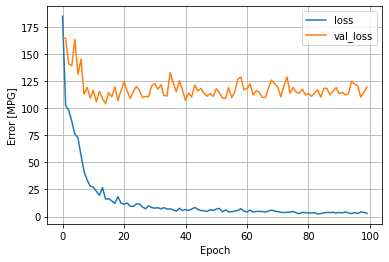

In [148]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


plot_loss(history)


In [145]:
preds = dnn_model.predict(np.array(X_test)).flatten()


51/51 [==============================] - 2s 27ms/step


In [147]:
preds/10**37

array([3.653239729496534, nan, nan, ..., nan, nan, 2.9779298028995904],
      dtype=object)

In [123]:
len(preds)

1614

In [134]:
y_train.max()

100.0

In [79]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [80]:
model = tf.keras.Sequential()
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

In [81]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
model.fit(X_train_scaled, y_train,
          batch_size=128,
          epochs=100,
          verbose=0,
          validation_data=(X_test_scaled, y_test))

TypeError: 'NoneType' object is not callable